<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 04
## Laboratorio Clase 02: Regresión Lineal

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Simón Masnú

__Rol__: 201503026-K

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
%matplotlib inline

## Ejercicio 1: Diabetes

Realizar análisis de regresión a los datos de diabetes disponibles en scikit-learn

In [2]:
diabetes = datasets.load_diabetes()
print(dir(diabetes))  ## Atributos

['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename']


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
diabetes_df = (
    pd.DataFrame(
        diabetes.data,
        columns=diabetes.feature_names
    )
    .assign(prog=diabetes.target)
)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


#### Pregunta 1 (1 pto):

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?

Respuesta:

* La columna sexo tiene esos datos pues seguramente se le asignó un valor cuantitativo a cada sexo y luego, como se menciona en la descripición del dataset, se normalizaron los datos de esa columna de modo que la suma de los cuadrados de la columna sea 1.

* La columna a predecir es "prog", una medida cuantitativa de la progresión de la enfermedad a lo largo de un año.

#### Pregunta 2 (1 pto)

Realiza una regresión lineal con todas las _features_ incluyendo intercepto.

In [5]:
X = diabetes_df.drop("prog",axis=1).values
y = diabetes_df["prog"].values

print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


Ajusta el modelo

In [6]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)
regr.fit(X,y)

regr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

Imprime el intercepto y los coeficientes luego de ajustar el modelo.

In [7]:
print(f"Intercept: \n{ regr.intercept_ }\n")
print(f"Coefficients: \n{regr.coef_}\n")

Intercept: 
152.1334841628965

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]



Haz una predicción del modelo con los datos `X`.

In [8]:
y_pred=regr.predict(X)




Calcula e imprime el error cuadrático medio y el coeficiente de determinación de este modelo ajustado.

In [9]:
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(y, y_pred):.2f}\n")

# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(y,y_pred):.2f}")

Mean squared error: 2859.69

Coefficient of determination: 0.52


**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

Basandonos en el coeficiente de determinación, podemos decir que el 52% de la variabilidad de los datos es explicada por el modelo, lo es bastante pobre.

Por regla general, un modelo se puede considerar bueno con un $r^{2}$ en torno al 0.9 o mayor.

### Pregunta 3 (2 ptos).

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [10]:
for i in range(X.shape[1]):
    X_i = X[:, np.newaxis, i]  # Protip! Trata de entender este paso por tu cuenta, es muy clever
    regr_i = LinearRegression(fit_intercept=True)
    regr_i.fit(X_i,y)
    y_pred_i = regr_i.predict(X_i)
    print(f"{diabetes_df.columns[i]}:")
    print(f"\tCoefficients: {regr.coef_}")
    print(f"\tIntercept: {regr.intercept_}")
    print(f"\tMean squared error: {mean_squared_error(y,y_pred_i):.2f}")
    print(f"\tCoefficient of determination: {r2_score(y,y_pred_i):.2f}\n")

age:
	Coefficients: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
	Intercept: 152.1334841628965
	Mean squared error: 5720.55
	Coefficient of determination: 0.04

sex:
	Coefficients: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
	Intercept: 152.1334841628965
	Mean squared error: 5918.89
	Coefficient of determination: 0.00

bmi:
	Coefficients: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
	Intercept: 152.1334841628965
	Mean squared error: 3890.46
	Coefficient of determination: 0.34

bp:
	Coefficients: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
	Intercept: 152.1334841628965
	Mean squared error: 4774.10
	C

**Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

Escogería el bmi pues es el que presenta menor error medio cuadrático y mayor coeficiente de determinación

Con la feature escogida haz el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefiera.

Text(0.5, 0, 'BMI')

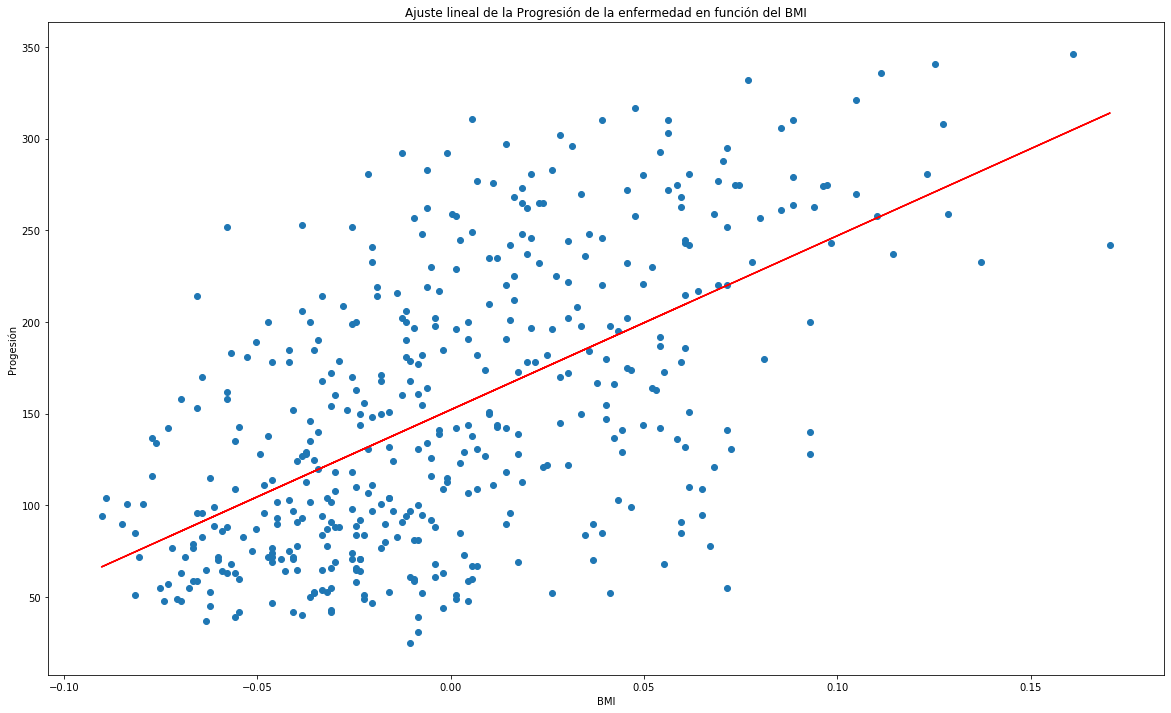

In [11]:
def ajuste(x):
    return x*regr.coef_ + regr.intercept_

x = diabetes_df["bmi"].values[:, np.newaxis]

regr=LinearRegression(fit_intercept=True)
regr.fit(x,y)

fig=plt.figure(figsize=(20, 12))

aj=plt.plot(x,ajuste(x),'r')
sc=plt.scatter(x,y)

plt.title('Ajuste lineal de la Progresión de la enfermedad en función del BMI')
plt.ylabel('Progesión')
plt.xlabel('BMI')

